# Exercise 1

## 1a.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# load data
claims = np.loadtxt('clms.txt')

In [3]:
print("Mean:", np.mean(claims))
print("Median:", np.median(claims))
print("Max:", np.max(claims))
print("Min:", np.min(claims))
print("Standard deviation:", np.std(claims))

Mean: 720.2779753272437
Median: 172.21
Max: 227967.25
Min: 0.01
Standard deviation: 3972.663756393663


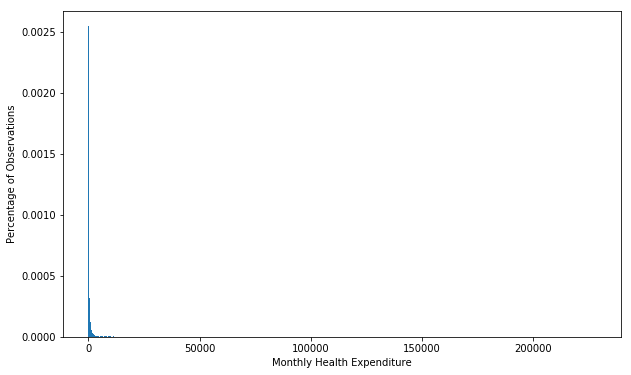

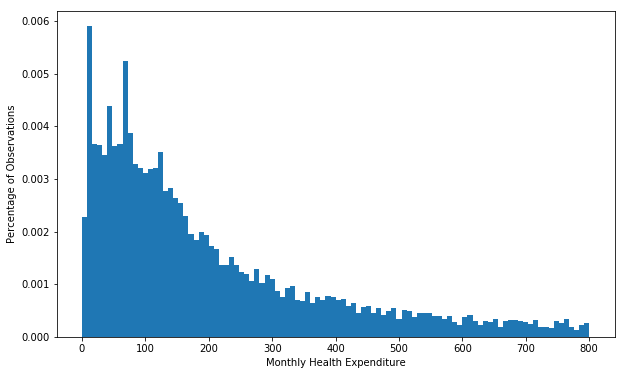

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(claims, 1000, density=True)
plt.xlabel("Monthly Health Expenditure")
plt.ylabel("Percentage of Observations")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(claims, 100, range=(0, 800), density=True)
plt.xlabel("Monthly Health Expenditure")
plt.ylabel("Percentage of Observations")
plt.show()

The second histogram is preferable because it is substantially more interpretable.

## 1b.

In [5]:
from scipy import stats as sts
from scipy import optimize as opt
from scipy.special import gamma, beta

In [6]:
def gamma_pdf(x, α, β): 
    '''Returns pdf values of gamma distribution'''
    pdf_vals = 1/(β ** α * (gamma(α))) * x ** (α-1) * np.exp(-(x/β))
    return pdf_vals

def logL_gamma(x, α, β):
    '''Get log-likelihood value for given parameters α and β'''
    pdf_vals = gamma_pdf(x, α, β)
    log_pdf_vals = np.log(pdf_vals)
    logL_val = np.sum(log_pdf_vals)
    return logL_val

def crit_gamma(params, x):
    '''Get criterion function for minimization problem'''
    α, β = params
    logL_val = logL_gamma(x, α, β)
    return -logL_val

In [7]:
β0_gamma = np.var(claims) / np.mean(claims)
α0_gamma = np.mean(claims) / β0_gamma
α0_gamma, β0_gamma

(0.032872796694206986, 21911.064702753894)

In [8]:
params0_gamma = np.array([α0_gamma, β0_gamma])
MLE_gamma = opt.minimize(crit_gamma, params0_gamma, args=claims, 
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
α_MLE_gamma, β_MLE_gamma = MLE_gamma.x
logL_val_gamma = -MLE_gamma.fun
print("α_MLE:", α_MLE_gamma)
print("β_MLE:", β_MLE_gamma)
print("Log likelihood:", logL_val_gamma)

α_MLE: 0.22175532272679777
β_MLE: 21911.064699249375
Log likelihood: -82076.45160566256


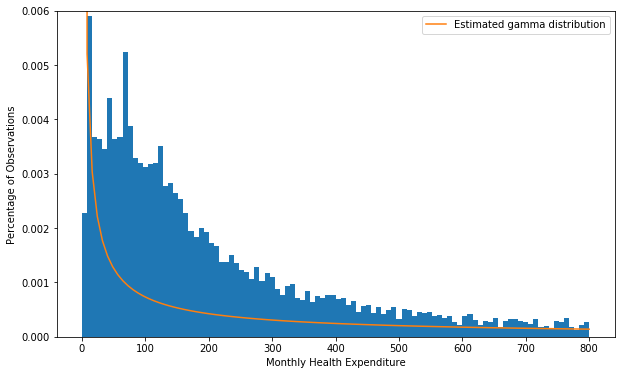

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(claims, 100, range=(0, 800), density=True)
x_int = np.linspace(1e-5, 800, 100)
plt.plot(x_int, gamma_pdf(x_int, α_MLE_gamma, β_MLE_gamma), label="Estimated gamma distribution")
plt.ylim(0, 0.006)
plt.xlabel("Monthly Health Expenditure")
plt.ylabel("Percentage of Observations")
plt.legend()
plt.show()

## 1c.

In [10]:
def generalized_gamma_pdf(x, α, β, m): 
    '''Returns pdf values of generalized gamma distribution'''
    pdf_vals = m/(β ** α * (gamma(α/m))) * x ** (α-1) * np.exp(-(x/β) ** m)
    return pdf_vals

def logL_generalized_gamma(x, α, β, m):
    '''Get log-likelihood value for given parameters α, β, and m'''
    pdf_vals = generalized_gamma_pdf(x, α, β, m)
    log_pdf_vals = np.log(pdf_vals)
    logL_val = np.sum(log_pdf_vals)
    return logL_val

def crit_generalized_gamma(params, x):
    '''Get criterion function for minimization problem'''
    α, β, m = params
    logL_val = logL_generalized_gamma(x, α, β, m)
    return -logL_val

In [11]:
α0_gen_gamma = α_MLE_gamma
β0_gen_gamma = β_MLE_gamma
m = 1
α0_gen_gamma, β0_gen_gamma, m

(0.22175532272679777, 21911.064699249375, 1)

In [12]:
params0_gen_gamma = np.array([α0_gen_gamma, β0_gen_gamma, m])
MLE_gen_gamma = opt.minimize(crit_generalized_gamma, params0_gen_gamma, args=claims, 
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None), (1e-10, None)))
α_MLE_gen_gamma, β_MLE_gen_gamma, m_MLE_gen_gamma = MLE_gen_gamma.x
logL_val_gen_gamma = -MLE_gen_gamma.fun
print("α_MLE:", α_MLE_gen_gamma)
print("β_MLE:", β_MLE_gen_gamma)
print("m_MLE:", m_MLE_gen_gamma)
print("Log likelihood:", logL_val_gen_gamma)

α_MLE: 0.22173761759457977
β_MLE: 21911.064431816903
m_MLE: 0.9970915637772736
Log likelihood: -82076.44679085154


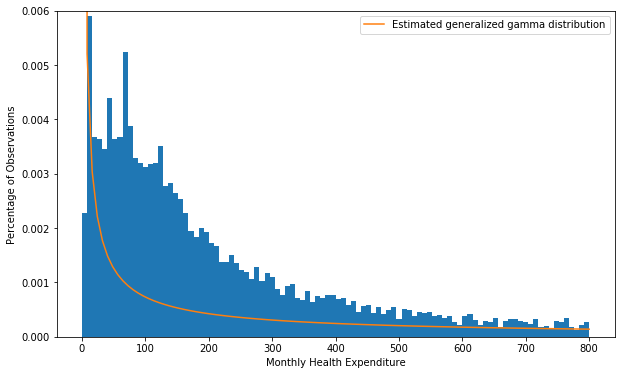

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(claims, 100, range=(0, 800), density=True)
x_int = np.linspace(1e-5, 800, 100)
plt.plot(x_int, generalized_gamma_pdf(x_int, α_MLE_gen_gamma, β_MLE_gen_gamma, m_MLE_gen_gamma), label="Estimated generalized gamma distribution")
plt.ylim(0, 0.006)
plt.xlabel("Monthly Health Expenditure")
plt.ylabel("Percentage of Observations")
plt.legend()
plt.show()

## 1d.

In [14]:
def beta_pdf(x, a, b, p, q): 
    '''Returns pdf values of generalized beta distribution'''
    pdf_vals = (a * x ** (a*p-1)) / (b ** (a*p) * beta(p, q) * (1 + (x / b) ** a) ** (p+q))
    return pdf_vals

def logL_beta(x, a, b, p, q):
    '''Get log-likelihood value for given parameters a, b, p, and q'''
    pdf_vals = beta_pdf(x, a, b, p, q)
    log_pdf_vals = np.log(pdf_vals)
    logL_val = np.sum(log_pdf_vals)
    return logL_val

def crit_beta(params, x):
    '''Get criterion function for minimization problem'''
    a, b, p, q = params
    logL_val = logL_beta(x, a, b, p, q)
    return -logL_val

In [15]:
q0 = 200
a0 = m_MLE_gen_gamma
b0 = q0 ** (1/m_MLE_gen_gamma) * β_MLE_gen_gamma
p0 = α_MLE_gen_gamma / m_MLE_gen_gamma
a0, b0, p0, q0

(0.9970915637772736, 4450465.018935543, 0.22238440846352467, 200)

In [16]:
params0_beta = np.array([a0, b0, p0, q0])
MLE_beta = opt.minimize(crit_beta, params0_beta, args=claims, 
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None)))
a_MLE_beta, b_MLE_beta, p_MLE_beta, q_MLE_beta = MLE_beta.x
logL_val_beta = -MLE_beta.fun
print("a_MLE:", a_MLE_beta)
print("b_MLE:", b_MLE_beta)
print("p_MLE:", p_MLE_beta)
print("q_MLE:", q_MLE_beta)
print("Log likelihood:", logL_val_beta)

a_MLE: 0.09925749493551894
b_MLE: 4450465.018948965
p_MLE: 61.37032914836325
q_MLE: 166.1472846546687
Log likelihood: -74873.52720446425


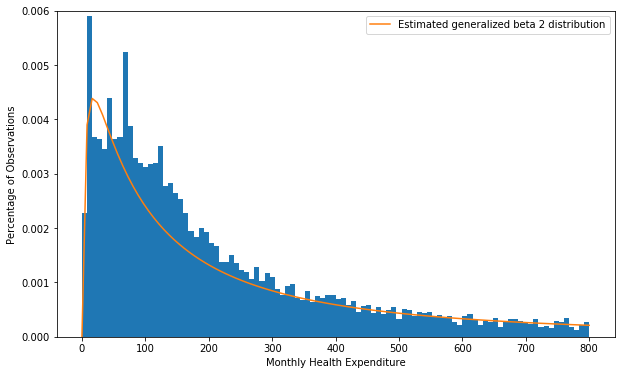

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(claims, 100, range=(0, 800), density=True)
x_int = np.linspace(1e-5, 800, 100)
plt.plot(x_int, beta_pdf(x_int, a_MLE_beta, b_MLE_beta, p_MLE_beta, q_MLE_beta), label="Estimated generalized beta 2 distribution")
plt.ylim(0, 0.006)
plt.xlabel("Monthly Health Expenditure")
plt.ylabel("Percentage of Observations")
plt.legend()
plt.show()

## 1e.

In [18]:
# likilihood ratio test for part (c)
LR_val = 2 * (logL_val_beta - logL_val_gamma)
pval_c = 1.0 - sts.chi2.cdf(LR_val, 4)
print('Chi squared of estimated gamma distribution with 4 degrees of freedom p-value = ', pval_c)

Chi squared of estimated gamma distribution with 4 degrees of freedom p-value =  0.0


In [19]:
# likilihood ratio test for part (d)
LR_val = 2 * (logL_val_beta - logL_val_gen_gamma)
pval_d = 1.0 - sts.chi2.cdf(LR_val, 4)
print('Chi squared of estimated gamma distribution with 4 degrees of freedom p-value = ', pval_c)

Chi squared of estimated gamma distribution with 4 degrees of freedom p-value =  0.0


## 1f.

In [20]:
from scipy import integrate

In [21]:
# find probability of having a monthly health care claim > $1000
beta_p1000 = integrate.quad(beta_pdf, 1000, np.inf, args=(a_MLE_beta, b_MLE_beta, p_MLE_beta, q_MLE_beta))[0]
gamma_p1000 = integrate.quad(gamma_pdf, 1000, np.inf, args=(α_MLE_gamma, β_MLE_gamma))[0]

In [22]:
print("Probability of monthly healthcare claim > $1000 (GB2)", round(beta_p1000, 3))
print("Probability of monthly healthcare claim > $1000 (GA)", round(gamma_p1000, 3))

Probability of monthly healthcare claim > $1000 (GB2) 0.131
Probability of monthly healthcare claim > $1000 (GA) 0.452


# Exercise 2

## 2a.

In [23]:
import pandas as pd
from scipy.stats import norm

In [24]:
# load data
data = pd.read_csv("MacroSeries.txt", names=["c", "k", "w", "r", "y"])
β = 0.99

In [25]:
def logL_BM_kw(params, k, w):
    '''Get log-likelihood for Brock and Mirman model with given parameters'''
    α, ρ, μ, σ = params
    z = np.log(w / ((1 - α) * k ** α))  # use w and k from data to back out z
    ϵ = z[1:] - ρ * z[:-1] - (1 - ρ) * μ  # normally distributed ϵ

    pdf_vals = 1 / (σ * np.sqrt(2 * np.pi)) * np.exp((-1 / 2) * (ϵ / σ) ** 2)  # pdf of normal distribution
    log_pdf_vals = np.log(pdf_vals)
    return np.sum(log_pdf_vals)
    
def crit_BM_kw(params, *args):
    '''Get criterion function for minimization problem'''
    k, w = args
    logL_val = logL_BM_kw(params, k, w)
    return -logL_val

In [26]:
params0_BM_kw = np.array([0.5, 0.5, 0.5, 0.5])  # set parameters within bounds
BM_args_kw = (data.k.values, data.w.values)
MLE_BM_kw = opt.minimize(crit_BM_kw, params0_BM_kw, args=BM_args_kw, method='L-BFGS-B', bounds=((1e-2, 1-1e-2), (-1+1e-2, 1-1e-2), (1e-2, None), (1e-2, None)))
α_MLE_BM_kw, ρ_MLE_BM_kw, μ_MLE_BM_kw, σ_MLE_BM_kw = MLE_BM_kw.x
logL_val_BM_kw = -MLE_BM_kw.fun
hess_inv_BM_kw = MLE_BM_kw.hess_inv.todense()

In [27]:
print("α_MLE:", α_MLE_BM_kw)
print("ρ_MLE:", ρ_MLE_BM_kw)
print("μ_MLE:", μ_MLE_BM_kw)
print("σ_MLE:", σ_MLE_BM_kw)
print("Log likelihood:", logL_val_BM_kw)
VCV_matrix_kw = hess_inv_BM_kw * np.identity(4) + hess_inv_BM_kw * (np.identity(4) - 1)
print("Inverse Hessian Variance-Covariance Matrix:\n", VCV_matrix_kw)

α_MLE: 0.5533989866050142
ρ_MLE: 0.8246535696409815
μ_MLE: 8.106616697400304
σ_MLE: 0.09324765675935562
Log likelihood: 94.40220131003798
Inverse Hessian Variance-Covariance Matrix:
 [[ 1.03390099e+00  2.70852977e+00  1.42016605e+01 -2.14509936e-01]
 [ 2.70852977e+00  7.32055512e+00 -3.72841156e+01  5.80516988e-01]
 [ 1.42016605e+01 -3.72841156e+01  1.95114319e+02  2.95254168e+00]
 [-2.14509936e-01  5.80516988e-01  2.95254168e+00  4.61813866e-02]]


## 2b.

In [28]:
def logL_BM_kr(params, k, r):
    '''Get log-likelihood for Brock and Mirman model with given parameters'''
    α, ρ, μ, σ = params
    z = np.log(r / (α * k ** (α - 1)))  # use r and k from data to back out z
    ϵ = z[1:] - ρ * z[:-1] - (1 - ρ) * μ  # normally distributed ϵ

    pdf_vals = 1 / (σ * np.sqrt(2 * np.pi)) * np.exp((-1 / 2) * (ϵ / σ) ** 2)  # pdf of normal distribution
    log_pdf_vals = np.log(pdf_vals)
    return np.sum(log_pdf_vals)
    
def crit_BM_kr(params, *args):
    '''Get criterion function for minimization problem'''
    k, r = args
    logL_val = logL_BM_kr(params, k, r)
    return -logL_val

In [29]:
params0_BM_kr = np.array([0.5, 0.8, 0.5, 0.5])  # set parameters within bounds
BM_args_kr = (data.k.values, data.r.values)
MLE_BM_kr = opt.minimize(crit_BM_kr, params0_BM_kr, args=BM_args_kr, 
                       method='L-BFGS-B', bounds=((1e-2, 1-1e-2), (-1+1e-2, 1-1e-2), (1e-2, None), (1e-2, None)))
α_MLE_BM_kr, ρ_MLE_BM_kr, μ_MLE_BM_kr, σ_MLE_BM_kr = MLE_BM_kr.x
logL_val_BM_kr = -MLE_BM_kr.fun
hess_inv_BM_kr = MLE_BM_kr.hess_inv.todense()

In [30]:
print("α_MLE:", α_MLE_BM_kr)
print("ρ_MLE:", ρ_MLE_BM_kr)
print("μ_MLE:", μ_MLE_BM_kr)
print("σ_MLE:", σ_MLE_BM_kr)
print("Log likelihood:", logL_val_BM_kr)
VCV_matrix_kr = hess_inv_BM_kr * np.identity(4) + hess_inv_BM_kr * (np.identity(4) - 1)
print("Inverse Hessian Variance-Covariance Matrix:\n", VCV_matrix_kr)

α_MLE: 0.5533901155801292
ρ_MLE: 0.8246607084073636
μ_MLE: 7.5695852936005785
σ_MLE: 0.09324736575305645
Log likelihood: 94.40220130404226
Inverse Hessian Variance-Covariance Matrix:
 [[ 1.87162752e+02  6.26604961e+01  3.35712025e+03 -3.94487499e+00]
 [ 6.26604961e+01  2.18037078e+01 -1.12173486e+03  7.94041658e-01]
 [ 3.35712025e+03 -1.12173486e+03  6.02222280e+04  7.21671881e+01]
 [-3.94487499e+00  7.94041658e-01  7.21671881e+01  4.20625846e-01]]


## 2c.

In [31]:
kt = 75e5
ztm1 = 10
zt = np.log(1 / (α_MLE_BM_kw * kt ** (α_MLE_BM_kw - 1)))
prob = 1.0 - norm.cdf(zt, loc=ρ_MLE_BM_kw * ztm1 + (1 - ρ_MLE_BM_kw) * μ_MLE_BM_kw, scale=σ_MLE_BM_kw)

In [32]:
print("Pr(rt > 1):", prob)

Pr(rt > 1): 1.0


The probability that the interest rate this period will be greater that $r_t = 1$ is approximately 1.0.

# Exercise 3

## 3a.

In [33]:
incomes = pd.read_csv("usincmoms.txt", sep='\t', names=['percent', 'midpoint'])
incomes.midpoint /= 1000

In [34]:
incomes['weights'] = incomes['percent'] / 5
incomes['weights'][40] /= 10
incomes['weights'][41] /= 20

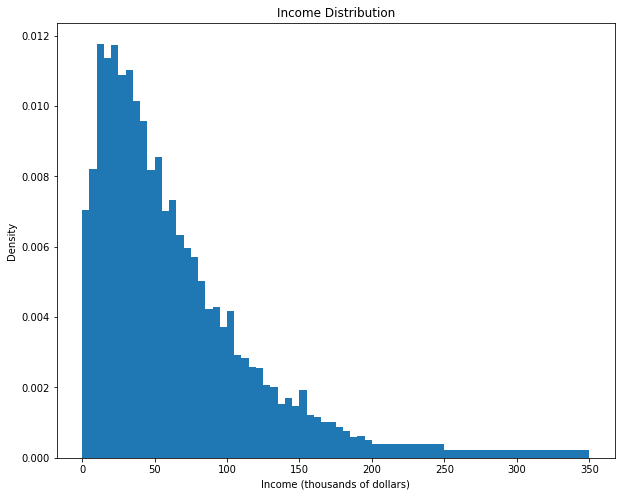

In [35]:
bins = np.append(np.arange(0, 201, 5), [250, 350])
plt.figure(figsize=(10, 8))
plt.hist(incomes.midpoint, bins=bins, weights=incomes.weights)
plt.xlabel("Income (thousands of dollars)")
plt.ylabel("Density")
plt.title("Income Distribution")
plt.show()

## 3b.

In [36]:
def lognorm_pdf(x, μ, σ):
    '''Returns pdf values of lognormal distribution'''
    pdf_vals = 1 / (x * σ * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - μ) ** 2 / (2 * σ ** 2))
    return pdf_vals

def error_vec(x, params, bins, f):
    '''Compute vector of moment errors for f distribution'''
    # compute model moments
    n = len(bins)
    model_moments = np.zeros(n - 1)
    for i in range(n - 1):
        model_moments[i] = integrate.quad(f, bins[i], bins[i + 1], args=(params[0], params[1]))[0]
    model_moments[-1] /= 20
    model_moments[-2] /= 10
    # get data moments
    data_moments = x

    # compute error in moments
    error = (model_moments - data_moments) / data_moments
    return error
    
def crit_lognorm(params, *args):
    '''Compute GMM weighted sum of squared moment errors criterion function'''
    x, bins, W = args
    error = error_vec(x, params, bins, lognorm_pdf)
    crit_val = error.T @ W @ error
    return crit_val

In [37]:
μ0_GMM_lognorm = np.log(np.sum(incomes.midpoint * incomes.percent))
σ0_GMM_lognorm = 1.1
params0_lognorm = np.array([μ0_GMM_lognorm, σ0_GMM_lognorm])
income_vals = np.array(incomes.percent)
W = np.diag(income_vals)
lognorm_args = (income_vals, bins, W)

GMM_lognorm = opt.minimize(crit_lognorm, params0_lognorm, args=lognorm_args, method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
μ_GMM_lognorm, σ_GMM_lognorm = GMM_lognorm.x
min_crit_val_lognorm = GMM_lognorm.fun

In [38]:
print("μ_GMM:", μ_GMM_lognorm)
print("σ_GMM:", σ_GMM_lognorm)
print("Minimized criterion function:", min_crit_val_lognorm)

μ_GMM: 3.953032147694894
σ_GMM: 1.0369528636413203
Minimized criterion function: 0.06279916275024562


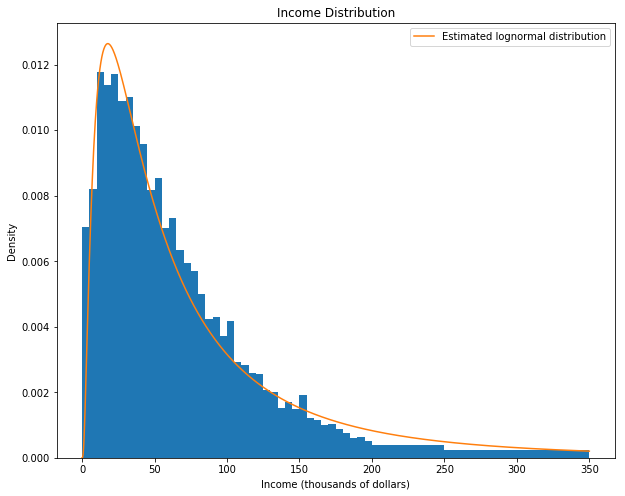

In [39]:
plt.figure(figsize=(10, 8))
plt.hist(incomes.midpoint, bins=bins, weights=incomes.weights)
plt.xlabel("Income (thousands of dollars)")
plt.ylabel("Density")
plt.title("Income Distribution")

x_int = np.linspace(1e-3, 350, 1000)
plt.plot(x_int, lognorm_pdf(x_int, μ_GMM_lognorm, σ_GMM_lognorm), label="Estimated lognormal distribution")
plt.legend()
plt.show()

## 3c.

In [40]:
def gamma_pdf(x, α, β): 
    '''Returns pdf values of gamma distribution'''
    pdf_vals = 1/(β ** α * (gamma(α))) * x ** (α-1) * np.exp(-(x/β))
    return pdf_vals
    
def crit_GMM_gamma(params, *args):
    '''Compute GMM weighted sum of squared moment errors criterion function'''
    x, bins, W = args
    error = error_vec(x, params, bins, gamma_pdf)
    crit_val = error.T @ W @ error
    return crit_val

In [41]:
α0_GMM_gamma = 3
β0_GMM_gamma = 20
params0_GMM_gamma = np.array([α0_GMM_gamma, β0_GMM_gamma])

gamma_GMM_args = (income_vals, bins, W)

GMM_gamma = opt.minimize(crit_GMM_gamma, params0_GMM_gamma, args=gamma_GMM_args, method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
α_GMM_gamma, β_GMM_gamma = GMM_gamma.x
min_crit_val_gamma = GMM_gamma.fun

In [42]:
print("α_GMM:", α_GMM_gamma)
print("β_GMM:", β_GMM_gamma)
print("Minimized criterion function:", min_crit_val_gamma)

α_GMM: 1.4058622046395204
β_GMM: 45.6186798624339
Minimized criterion function: 0.04376397344037805


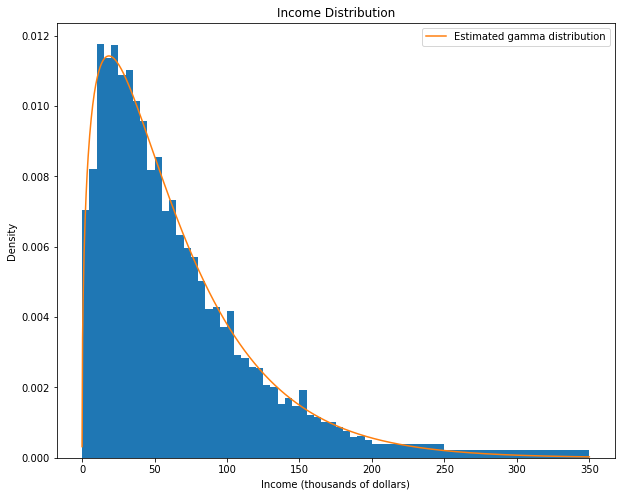

In [43]:
plt.figure(figsize=(10, 8))
plt.hist(incomes.midpoint, bins=bins, weights=incomes.weights)
plt.xlabel("Income (thousands of dollars)")
plt.ylabel("Density")
plt.title("Income Distribution")

plt.plot(x_int, gamma_pdf(x_int, α_GMM_gamma, β_GMM_gamma), label="Estimated gamma distribution")
plt.legend()
plt.show()

## 3d.

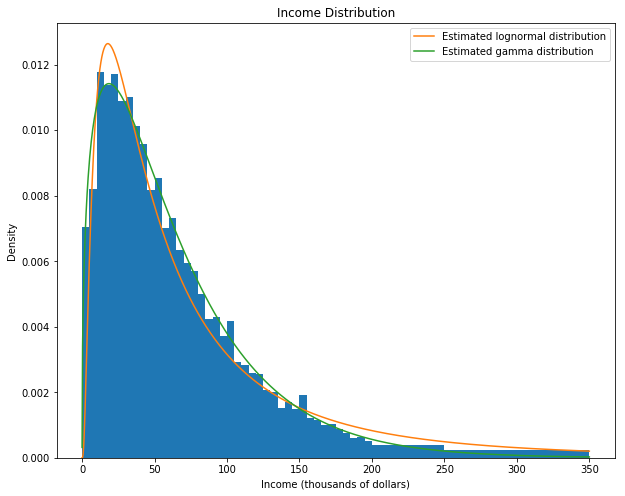

In [44]:
plt.figure(figsize=(10, 8))
plt.hist(incomes.midpoint, bins=bins, weights=incomes.weights)
plt.xlabel("Income (thousands of dollars)")
plt.ylabel("Density")
plt.title("Income Distribution")

plt.plot(x_int, lognorm_pdf(x_int, μ_GMM_lognorm, σ_GMM_lognorm), label="Estimated lognormal distribution")
plt.plot(x_int, gamma_pdf(x_int, α_GMM_gamma, β_GMM_gamma), label="Estimated gamma distribution")
plt.legend()
plt.show()

In [45]:
print("Error in lognormal distribution:", min_crit_val_gamma)
print("Error in lognormal distribution:", min_crit_val_lognorm)

Error in lognormal distribution: 0.04376397344037805
Error in lognormal distribution: 0.06279916275024562


## 3e.

In [46]:
from scipy import linalg as la

In [47]:
# Compute two step weighting matrix
# In part(c), we performed step 1: estimated parameters using I as the weighting matrix
params = (α_GMM_gamma, β_GMM_gamma)
error = error_vec(income_vals, params, bins, gamma_pdf)
N = len(income_vals)

In [48]:
# Step 2: get new weighting matrix
Ω = np.outer(error, error.T) / N
W_2step = la.pinv(Ω)

In [49]:
α0_GMM_gamma_w = 3
β0_GMM_gamma_w = 20
params0_GMM_gamma_w = np.array([α0_GMM_gamma_w, β0_GMM_gamma_w])

gamma_GMM_args_w = (income_vals, bins, W_2step)

GMM_gamma_w = opt.minimize(crit_GMM_gamma, params0_GMM_gamma_w, args=gamma_GMM_args_w, method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
α_GMM_gamma_w, β_GMM_gamma_w = GMM_gamma_w.x
min_crit_val_gamma_w = GMM_gamma_w.fun

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [50]:
print("α_GMM:", α_GMM_gamma_w)
print("β_GMM:", β_GMM_gamma_w)
print("Minimized criterion function:", min_crit_val_gamma_w)

α_GMM: 3.2717706370508504
β_GMM: 8.664488888335992
Minimized criterion function: nan


Something went very wrong here...

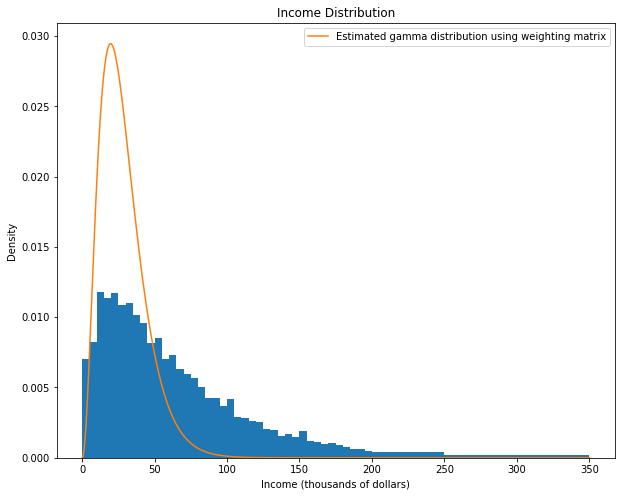

In [56]:
plt.figure(figsize=(10, 8))
plt.hist(incomes.midpoint, bins=bins, weights=incomes.weights)
plt.xlabel("Income (thousands of dollars)")
plt.ylabel("Density")
plt.title("Income Distribution")

plt.plot(x_int, gamma_pdf(x_int, α_GMM_gamma_w, β_GMM_gamma_w), label="Estimated gamma distribution using weighting matrix")
plt.legend()
plt.show()

# Exercise 4

In [52]:
# load data
data = pd.read_csv("MacroSeries.txt", names=["c", "k", "w", "r", "y"])

In [53]:
def BM_moments(params, zt, zt1, kt1, ct, ct1, wt):
    '''Returns BM model moment conditions'''
    α, β, ρ, μ = params
    moment1 = np.mean(zt1 - ρ * zt - (1 - ρ) * μ)
    moment2 = np.mean((zt1 - ρ * zt - (1 - ρ) * μ) * zt)
    moment3 = np.mean(β * α * np.exp(zt1) * kt1 ** (α-1) * (ct / ct1) - 1)
    moment4 = np.mean((β * α * np.exp(zt1) * kt1 ** (α-1) * (ct / ct1) - 1) * wt)
    moments = np.array([moment1, moment2, moment3, moment4])
    return moments

def BM_GMM(params, c, k, w):
    '''Returns errors in moments'''
    α, β, ρ, μ = params
    z = np.log(w / ((1 - α) * k ** α))  # back out z series
    
    # get t and t+1 series
    zt = z[:-1]
    zt1 = z[1:]
    kt1 = k[1:]
    ct = c[:-1]
    ct1 = c[1:]
    wt = w[:-1]
    
    # get moment conditions
    moments = BM_moments(params, zt, zt1, kt1, ct, ct1, wt)
    return moments

def crit_BM_GMM(params, *args):
    '''Returns the criterion function to minimize'''
    c, k, w, W = args
    error = BM_GMM(params, c, k, w)
    crit_val = error.T @ W @ error
    return crit_val
    

In [54]:
c, k, w = data.c.values, data.k.values, data.w.values
W = np.identity(4)
α0 = 0.5
β0 = 0.6
ρ0 = 0.99
μ0 = 1
params0 = np.array([α0, β0, ρ0, μ0])

GMM_BM = opt.minimize(crit_BM_GMM, params0, args=(c, k, w, W), method='L-BFGS-B', bounds=((1e-3, 1-1e-3), (1e-3, 1-1e-3), (-1+1e-3, 1-1e-3), (1e-3, None)))
α_GMM_BM, β_GMM_BM, ρ_GMM_BM, μ_GMM_BM = GMM_BM.x
min_crit_val_GMM_BM = GMM_BM.fun

In [55]:
print("α_GMM:", α_GMM_BM)
print("β_GMM:", β_GMM_BM)
print("ρ_GMM:", ρ_GMM_BM)
print("μ_GMM:", μ_GMM_BM)
print("Minimized criterion function:", min_crit_val_GMM_BM)

α_GMM: 0.5335342980929704
β_GMM: 0.6267781714825195
ρ_GMM: 0.9900000000343251
μ_GMM: 1.0000000000000417
Minimized criterion function: 0.34668844390866727
